In [ ]:
### Linear Regression 

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the principle of ordinary least square  (OLS)  / Mean square errror  (MSE) . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.


In [ ]:
### Content
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

In [ ]:
### Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset

In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
dataset = pd.read_excel(r'C:\Users\koruk\Desktop\Yapay Öğrenme\Commen\common_dataset_touch_features_offset.xlsx')

In [3]:
climate= pd.DataFrame(dataset)

In [4]:
climate.head()

,user_id,touch_type,touch,finger,palm,fist,1,2,3,4,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,False,False,False,False,4,0,12,-16,...,-51,4,1,3,-42,2,3,61,2,-1
1,0,0,False,False,False,False,-52,-2,17,1,...,-36,-1,49,6,-58,8,49,63,47,6
2,0,0,False,False,False,False,2,7,14,-5,...,1,55,54,-51,-26,55,56,9,55,52
3,0,0,False,False,False,False,0,6,10,8,...,1,2,28,2,1,9,55,53,-7,51
4,0,0,False,False,False,False,2,5,3,0,...,-25,51,-6,-45,-4,61,48,60,46,5


In [5]:
climate.describe()

,user_id,touch_type,1,2,3,4,5,6,7,8,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,...,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,14.144455,2.208658,6.383268,-0.736868,-1.372568,-1.951848,-0.771401,-0.479086,0.716926,0.893482,...,0.269942,9.160506,7.529183,-1.431420,4.392023,10.382782,6.484922,3.776265,3.038911,16.335603
std,8.776936,3.059943,37.765997,7.140939,8.932638,10.529769,12.400623,9.899473,13.253678,14.909682,...,31.318870,31.483043,35.528682,36.167375,37.094317,36.713209,37.415322,39.689446,36.621301,33.422914
min,0.000000,0.000000,-62.000000,-22.000000,-23.000000,-27.000000,-29.000000,-28.000000,-31.000000,-34.000000,...,-56.000000,-58.000000,-61.000000,-66.000000,-62.000000,-61.000000,-62.000000,-69.000000,-65.000000,-56.000000
25%,7.000000,0.000000,-2.000000,-6.000000,-8.000000,-9.000000,-9.000000,-7.000000,-7.000000,-9.000000,...,-21.000000,-9.000000,-4.000000,-37.000000,-27.000000,-5.000000,-7.000000,-10.000000,-16.000000,-1.000000
50%,14.000000,0.000000,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,5.000000,1.000000,4.000000,5.000000,5.000000,3.000000,1.000000,7.000000
75%,22.000000,4.000000,53.000000,5.000000,4.000000,6.000000,9.000000,7.000000,11.000000,13.000000,...,25.000000,34.000000,32.000000,13.000000,27.000000,49.000000,45.000000,22.000000,30.000000,51.000000
max,29.000000,9.000000,70.000000,21.000000,21.000000,23.000000,41.000000,22.000000,70.000000,46.000000,...,72.000000,100.000000,104.000000,92.000000,82.000000,107.000000,103.000000,101.000000,103.000000,99.000000


In [6]:
climate.info

<bound method DataFrame.info of       user_id  touch_type  touch  finger   palm   fist   1  2   3   4  ...  \
0           0           0  False   False  False  False   4  0  12 -16  ...   
1           0           0  False   False  False  False -52 -2  17   1  ...   
2           0           0  False   False  False  False   2  7  14  -5  ...   
3           0           0  False   False  False  False   0  6  10   8  ...   
4           0           0  False   False  False  False   2  5   3   0  ...   
...       ...         ...    ...     ...    ...    ...  .. ..  ..  ..  ...   
2051       29           9   True   False   True  False   0  4 -10   3  ...   
2052       29           9   True   False   True  False   8 -3 -13  -3  ...   
2053       29           9   True   False   True  False   8 -9 -12 -16  ...   
2054       29           9   True   False   True  False  56  0   0 -20  ...   
2055       29           0  False   False  False  False  11 -1 -12   2  ...   

      3191  3192  3193  3194  3

In [7]:
climate.isnull().sum()

user_id       0
touch_type    0
touch         0
finger        0
palm          0
             ..
3196          0
3197          0
3198          0
3199          0
3200          0
Length: 3206, dtype: int64

In [8]:
climate.shape

(2056, 3206)

In [9]:
list(climate)

['user_id',
 'touch_type',
 'touch',
 'finger',
 'palm',
 'fist',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174

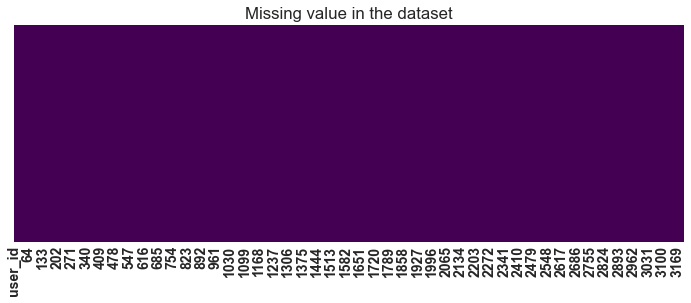

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(climate.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [11]:
climate.columns.values

array(['user_id', 'touch_type', 'touch', ..., 3198, 3199, 3200],
      dtype=object)

In [ ]:
### Cleaning the Dataset

We are going to remove and clean null values from our dataset

In [12]:
to_drop=['finger','palm', 'fist']
climate.drop(to_drop , inplace=True , axis=1)

In [13]:
climate.head(10)

,user_id,touch_type,touch,1,2,3,4,5,6,7,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,False,4,0,12,-16,-2,0,-25,...,-51,4,1,3,-42,2,3,61,2,-1
1,0,0,False,-52,-2,17,1,15,-9,-22,...,-36,-1,49,6,-58,8,49,63,47,6
2,0,0,False,2,7,14,-5,16,12,-17,...,1,55,54,-51,-26,55,56,9,55,52
3,0,0,False,0,6,10,8,-2,2,1,...,1,2,28,2,1,9,55,53,-7,51
4,0,0,False,2,5,3,0,17,10,-19,...,-25,51,-6,-45,-4,61,48,60,46,5
5,0,0,False,1,10,14,-8,-4,5,-19,...,-52,45,10,-50,-51,65,2,2,44,0
6,0,0,False,-51,-1,8,-1,13,-3,-25,...,-52,46,53,-51,-52,54,55,54,55,52
7,0,0,False,6,5,14,-8,-4,-7,-20,...,-52,46,51,-52,-52,54,55,54,55,53
8,0,0,False,1,0,16,6,9,-2,-4,...,-17,-7,0,11,0,0,45,2,1,50
9,0,0,False,5,6,21,-7,-9,6,-20,...,1,19,1,2,0,1,2,0,1,-2


In [14]:
climate=climate[~climate['user_id'].isna()]

In [15]:
climate=climate[~climate['touch_type'].isna()]

In [16]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Columns: 3203 entries, user_id to 3200
dtypes: bool(1), int64(3202)
memory usage: 50.2 MB


In [ ]:
# After this process, I could not continue because my computer took the load of the process, we displayed it on the data I chose.